In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [7]:
df = pd.read_csv('Ready for Model.csv')

### Train-Test-Split

In [8]:
x = df.drop('real_price', axis=1)
y = df[['real_price']]

In [9]:
x.head(2)

,floor_area_sqm,remaining_lease,school_dist,num_school_2km,hawker_dist,num_hawker_2km,mrt_dist,num_mrt_2km,supermarket_dist,num_supermarket_2km,dist_central,flat_type,storey_range,region_Central,region_East,region_North East,region_West,model_Apartment,model_Maisonette,model_Model A,model_New Generation,model_Premium Apartment,model_Special
0,0.547795,-0.328771,-0.742161,-0.406249,0.832325,-0.698658,1.284210,-0.804472,-0.007237,-1.440940,1.522085,2,0,0,0,0,1,0,0,1,0,0,0
1,0.299695,-0.408958,-0.899067,-0.406249,0.870029,-0.698658,1.445462,-0.967035,0.312519,-1.651818,1.537030,2,0,0,0,0,1,0,0,1,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=3)

In [11]:
#double check the input data/ target variable size information. 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(51355, 23) (51355, 1)
(12839, 23) (12839, 1)


In [12]:
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept: ', model.intercept_)
print('R^2 score: ', model.score(X_train, y_train))

Coefficients: [[ 0.19970139  0.12618463  0.00867373  0.0144533  -0.06488168  0.00670116
  -0.03312074 -0.0045287  -0.01120115 -0.02294252 -0.1192684   0.05711928
   0.0246334   0.13594464  0.09722974  0.02788497  0.04814254 -0.01003007
   0.04109029  0.03143517  0.06298505  0.03322956  0.17088654]]
Intercept:  [12.66265515]
R^2 score:  0.8735859719465257


Text(0, 0.5, 'Predictions')

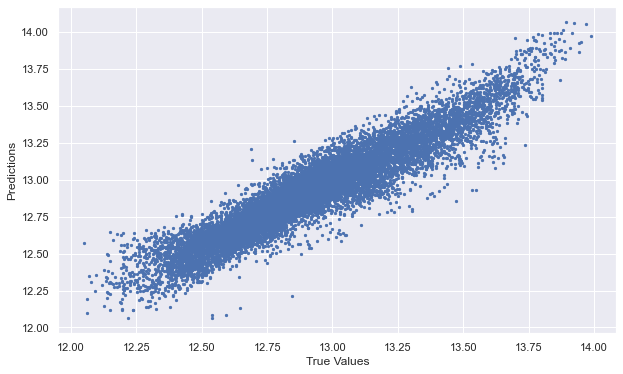

In [13]:
## Plot the accuracy of our predictions 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, s = 5)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Coefficient Analysis

In [14]:
coeff = list(model.coef_)
coefs = pd.DataFrame(
    data = coeff,
    columns = x.columns
)
coefs = coefs.transpose()
coefs.rename(columns={0: 'Coefficient'}, inplace =True)
coefs['Value'] = np.where(coefs['Coefficient']<0, 'Negative', 'Positive')
coefs['Abs_coefficient'] = coefs['Coefficient'].abs()
coefs.sort_values(by='Abs_coefficient', ascending = True, inplace = True)

In [16]:
coefs.sort_values(by='Abs_coefficient', ascending = False)

,Coefficient,Value,Abs_coefficient
floor_area_sqm,0.199701,Positive,0.199701
model_Special,0.170887,Positive,0.170887
region_Central,0.135945,Positive,0.135945
remaining_lease,0.126185,Positive,0.126185
dist_central,-0.119268,Negative,0.119268
region_East,0.097230,Positive,0.097230
hawker_dist,-0.064882,Negative,0.064882
model_New Generation,0.062985,Positive,0.062985
flat_type,0.057119,Positive,0.057119
region_West,0.048143,Positive,0.048143


Text(0.5, 1.0, 'Coefficients')

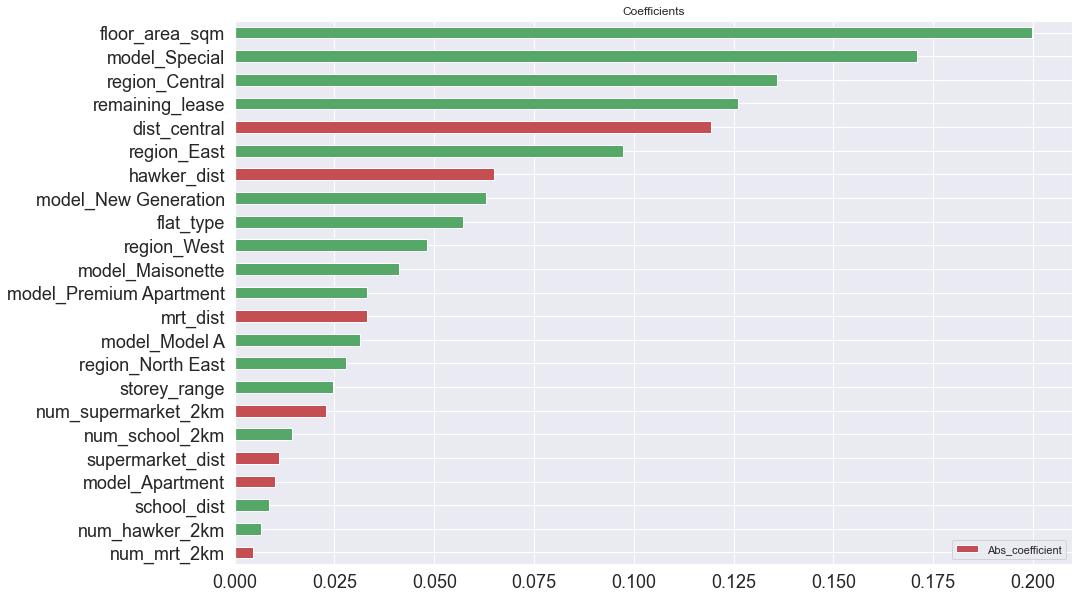

In [15]:
coefs.plot(kind='barh', y='Abs_coefficient', figsize=(15, 10), 
           color=(coefs['Value'] == 'Positive').map({True: 'g', False: 'r'}), fontsize = 18)
plt.title('Coefficients')

### Strong Coeffiecients

The top feature is unsuprisingly floor area sq meter. Singapore is land-scarce and so every additional floor sqm is highly correlated with the eventual price.

Coming in second is the flat model - 'Special' category. This is not that suprising - this category consist of naturally expensive, award winning design houses like DBSS, S1S2 as well as larger houses like adjoined and Terrace. 

Next come the regions. Compared to North, Central Region has much higher price.

After that, we have remaining lease. It seems people are very willing to pay more for houses with longer lease left.


Following, that we have distance to central. The further away from the central, the lower the price. This means people value staying near the central, possibly for its amenities like shopping malls at orchard, being closer to working area, ect.

### Weak Coefficients

MRTs within 2km has a weak negative correlation. This is probably because the more expensive homes are located in more exclusive places further away from the MRT. These home owners probably can own multiple cars, so not that important to them.

Schools, supermarkets also have a weak effect on price. 

### Retrain Model with Price per SF

In [4]:
df2 = pd.read_csv('Finished Prep Model.csv')
df2.head(2)

,floor_area_sqm,remaining_lease,school_dist,num_school_2km,hawker_dist,num_hawker_2km,mrt_dist,num_mrt_2km,supermarket_dist,num_supermarket_2km,dist_central,town,flat_type,storey_range,flat,Price_per_SF,real_price,region_Central,region_East,region_North East,region_West,model_Apartment,model_Maisonette,model_Model A,model_New Generation,model_Premium Apartment,model_Special
0,0.547795,-0.328771,-0.742161,-0.406249,0.832325,-0.698658,1.284210,-0.804472,-0.007237,-1.440940,1.522085,JURONG WEST,2,0,942 JURONG WEST ST 91,7.947493,12.657023,0,0,0,1,0,0,1,0,0,0
1,0.299695,-0.408958,-0.899067,-0.406249,0.870029,-0.698658,1.445462,-0.967035,0.312519,-1.651818,1.537030,JURONG WEST,2,0,941 JURONG WEST ST 91,7.895801,12.549761,0,0,0,1,0,0,1,0,0,0


In [12]:
x = df2.drop(['real_price', 'Price_per_SF', 'town', 'flat'], axis=1)
y = df2[['Price_per_SF']]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=3)

In [14]:
#double check the input data/ target variable size information. 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(51355, 23) (51355, 1)
(12839, 23) (12839, 1)


In [15]:
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept: ', model.intercept_)
print('R^2 score: ', model.score(X_train, y_train))

Coefficients: [[-0.03853733  0.12591476  0.00893227  0.01329298 -0.06630388  0.00708118
  -0.03385117 -0.00499788 -0.01137951 -0.0223502  -0.11685526  0.01412529
   0.02420673  0.13706889  0.09902742  0.02929021  0.04841117  0.09209911
   0.14890443 -0.0098509   0.02118562  0.01161496  0.15678614]]
Intercept:  [8.2206726]
R^2 score:  0.7661205645921433


Text(0, 0.5, 'Predictions')

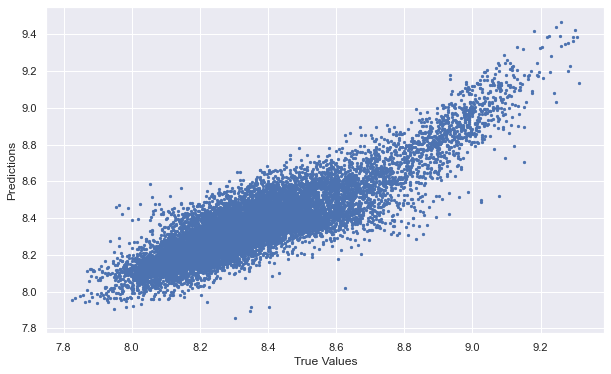

In [16]:
## Plot the accuracy of our predictions 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, s = 5)
plt.xlabel("True Values")
plt.ylabel("Predictions")

model is not as linear as compared to real price

### Coefficient Analysis

In [18]:
coeff = list(model.coef_)
coefs = pd.DataFrame(
    data = coeff,
    columns = x.columns
)
coefs = coefs.transpose()
coefs.rename(columns={0: 'Coefficient'}, inplace =True)
coefs['Value'] = np.where(coefs['Coefficient']<0, 'Negative', 'Positive')
coefs['Abs_coefficient'] = coefs['Coefficient'].abs()
coefs.sort_values(by='Abs_coefficient', ascending = True, inplace = True)

Text(0.5, 1.0, 'Coefficients')

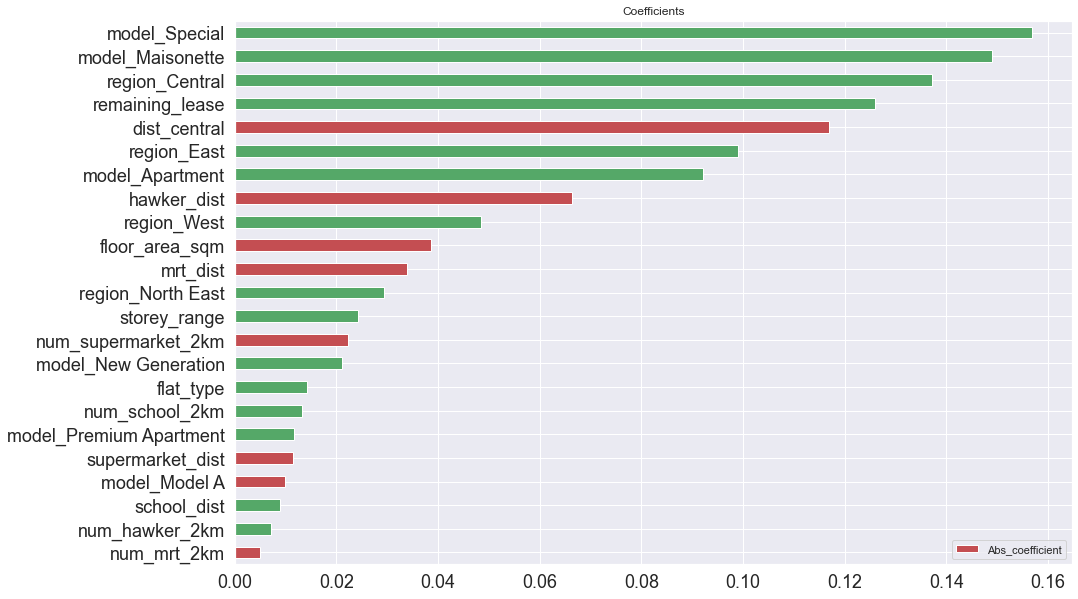

In [19]:
coefs.plot(kind='barh', y='Abs_coefficient', figsize=(15, 10), 
           color=(coefs['Value'] == 'Positive').map({True: 'g', False: 'r'}), fontsize = 18)
plt.title('Coefficients')

Coefficient importances are roughly unchanged. model type Maisonette has moved up a few positions. Probably because the price to square area ratio for Maisonette-model flats is quite high.